Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



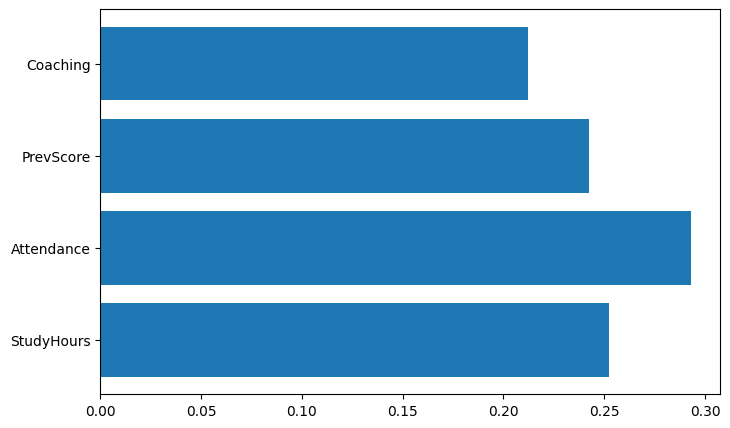

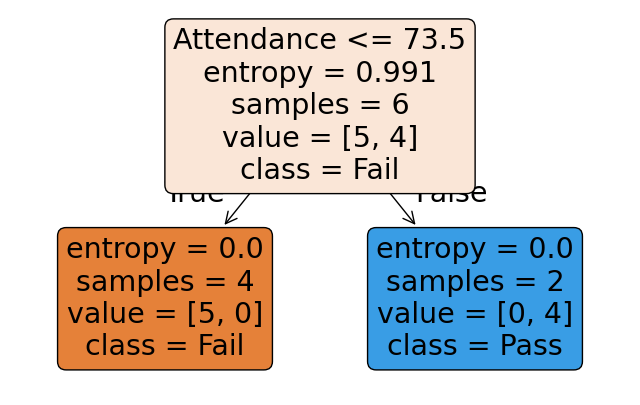

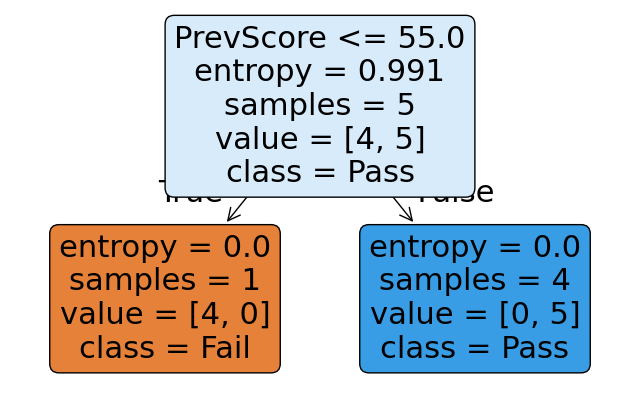

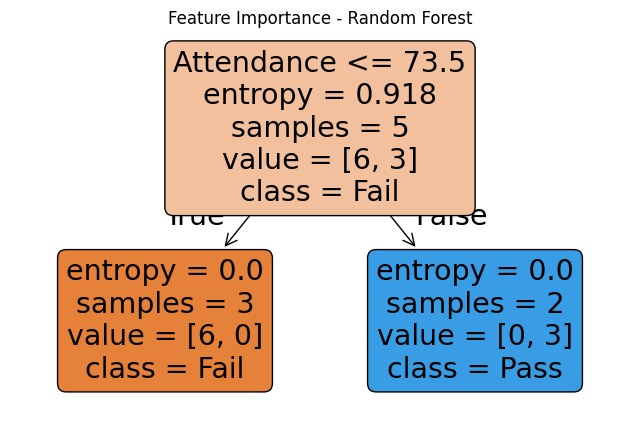

In [10]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Step 2: Create dataset
data = {
   "StudyHours": [1, 2, 3, 4, 5, 6, 7, 2, 4, 6, 8, 3],
   "Attendance": [60, 65, 70, 75, 80, 85, 90, 68, 78, 88, 92, 72],
   "PrevScore": [45, 50, 55, 60, 65, 70, 75, 52, 63, 73, 85, 58],
   "Coaching": [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
   "Pass": [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
}
df = pd.DataFrame(data)
# Step 3: Split features & target
X = df.drop("Pass", axis=1)
y = df["Pass"]
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42
)
# Step 5: Train Random Forest model
rf_model = RandomForestClassifier(
   n_estimators=100,
   criterion="entropy",
   max_depth=5,
   random_state=42
)
rf_model.fit(X_train, y_train)
# Step 6: Predictions
y_pred = rf_model.predict(X_test)
# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Step 8: Feature Importance
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances)
plt.show()
# Step 9: Visualize Decision Trees

plt.figure(figsize=(8, 5))
tree = rf_model.estimators_[0]
plot_tree(
   tree,
   feature_names=X.columns,
   class_names=["Fail", "Pass"],
   filled=True,
   rounded=True
)
plt.show()
plt.figure(figsize=(8, 5))
tree1 = rf_model.estimators_[1]
plot_tree(
   tree1,
   feature_names=X.columns,
   class_names=["Fail", "Pass"],
   filled=True,
   rounded=True
)
plt.show()

plt.figure(figsize=(8, 5))
tree2 = rf_model.estimators_[90]
plot_tree(
   tree2,
   feature_names=X.columns,
   class_names=["Fail", "Pass"],
   filled=True,
   rounded=True
)
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()